In [1]:
import numpy as np
import pandas as pd
import sgdLR
import seaborn as sns
import matplotlib.pyplot as plt
from lr import LinearRegression, file_to_numpy

In [2]:
# load the train and test data
xTrain = file_to_numpy("new_xTrain.csv")
yTrain = file_to_numpy("eng_yTrain.csv")
xTest = file_to_numpy("new_xTest.csv")
yTest = file_to_numpy("eng_yTest.csv")

# setting the seed for deterministic behavior
np.random.seed(334)

# shuffle, get 40%, then seperate again
combo = np.concatenate((xTrain, yTrain), axis=1)  # add the yTrain to xTrain 
np.random.shuffle(combo)  # shuffle it
combo = combo[:int(len(combo)*0.4)]
yTrain = combo[: ,[len(xTrain[0])]].copy()
xTrain = np.delete(combo, len(xTrain[0]), axis=1)

In [3]:
bs = 1  # set batch size to 1
epoch = 21 # epoch is set here to have the scale of the chart make sense

In [4]:
# adjust learning rate, get model, get stats, repeat
lr = 0.1
model = sgdLR.SgdLR(lr, bs, epoch)
stats1 = model.train_predict(xTrain, yTrain, xTest, yTest)

In [ ]:
lr = 0.01
model = sgdLR.SgdLR(lr, bs, epoch)
stats2 = model.train_predict(xTrain, yTrain, xTest, yTest)

In [ ]:
lr = 0.001
model = sgdLR.SgdLR(lr, bs, epoch)
stats3 = model.train_predict(xTrain, yTrain, xTest, yTest)

In [ ]:
lr = 0.0001
model = sgdLR.SgdLR(lr, bs, epoch)
stats4 = model.train_predict(xTrain, yTrain, xTest, yTest)

In [ ]:
lr = 0.00001
model = sgdLR.SgdLR(lr, bs, epoch)
stats5 = model.train_predict(xTrain, yTrain, xTest, yTest)

In [ ]:
# Construct a dataframe and then fill it with whatever the training MSE is at the end of each epoch
df = pd.DataFrame(columns=['0.1', '0.01', '0.001', '0.0001', '0.00001'])  # columns are learning rates
B = int(len(xTrain)/bs)

series = pd.Series({'0.1': stats1[0]['train-mse'], '0.01': stats2[0]['train-mse'], 
    '0.001': stats3[0]['train-mse'], '0.0001': stats4[0]['train-mse'], '0.00001': stats5[0]['train-mse']})
df = df.append(series, ignore_index=True)

for currEpoch in range(1, epoch):
    series = pd.Series({'0.1': stats1[B * currEpoch - 1]['train-mse'], '0.01': stats2[B * currEpoch - 1]['train-mse'], 
    '0.001': stats3[B * currEpoch - 1]['train-mse'], '0.0001': stats4[B * currEpoch - 1]['train-mse'], '0.00001': stats5[B * currEpoch - 1]['train-mse']})
    df = df.append(series, ignore_index=True)

# print(df)

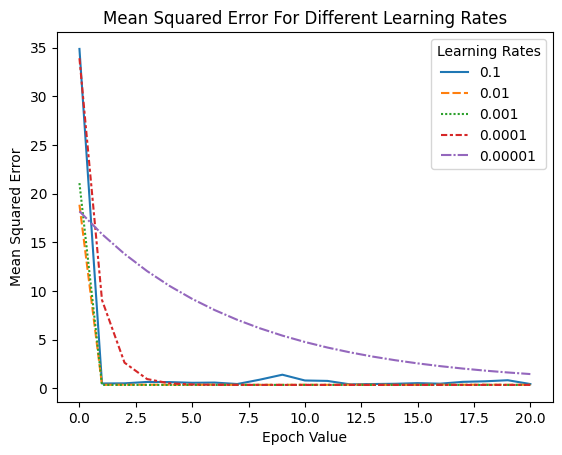

In [ ]:
# use some seaborn to make the plot
graph = sns.lineplot(data=df)
graph.set(xlabel="Epoch Value", ylabel="Mean Squared Error", title="Mean Squared Error For Different Learning Rates")
graph.legend(title="Learning Rates")
plt.show()